<h1 style="text-align: center;">Strategi Meningkatkan Revenue Cyclistic melalui Peningkatan Jumlah Anggota (Member) Tahunan - Studi Kasus</h1>

***

## Tentang

Studi kasus ini merupakan bagian dari kursus Data Analitik oleh Coursera yang dibuat sedemikian rupa sehingga peserta bisa mengimplementasikan kemampuan-kemampuan yang telah diperoleh sebelumnya. Proses analisis data meliputi beberapa tahapan: Bertanya (_Ask_), Mempersiapkan Data (_Prepare_), Memproses Data Kotor ke Bersih (_Process_), Menganalisis Data (_Analyze_), Berbagi Data melalui Visualisasi (_Share_), dan Bertindak Berdasarkan Data (_Act_). Proses inilah yang dijadikan acuan bagi analis untuk menyelesaikan suatu permasalahan.

## Latar Belakang

Cyclistic merupakan sebuah perusahaan berbagi sepeda (_bike sharing_) yang beroperasi di Chicago. Cyclistic memiliki lebih dari 5800 sepeda dengan 600 stasiun dok yang dapat disewakan kapan saja. Terdapat tiga jenis sepeda yang ditawarkan Cyclistic: **sepeda klasik**, **sepeda listrik**, dan **sepeda dock**.

Sekitar 70% pengendara menggunakan sepeda untuk bersantai dan sekitar 30% menggunakannya untuk bepergian ke tempat kerja setiap hari. Pengendara sepeda Cyclistic dibedakan menjadi _**member biasa**_ dan _**member tahunan**_. Member biasa adalah pengendara yang menggunakan sepeda untuk sekali jalan, sedangkan member tahunan adalah mereka yang telah membeli keanggotaan tahunan Cyclistic.

Direktur pemasaran percaya bahwa kesuksesan Cyclistic bergantung pada **usaha untuk memaksimalkan jumlah member tahunan**. Oleh karena itu, perlu diketahui apa yang membedakan member biasa dan member tahunan dalam segi penggunaan sepeda dan perlu disiapkan strategi untuk mempromosikan member tahunan pada member biasa.

## Bertanya (_Ask_)

Berdasarkan latar belakang yang telah dijelaskan, pertanyaan-pertanyaan berikut ini dapat memberikan gambaran bagaimana lingkup kerja dari studi ini dilakukan. Pertanyaan tersebut adalah sebagai berikut:

1. Apa yang membedakan member biasa dengan member tahunan?
2. Tipe sepeda apa yang diminati member biasa?
3. Kapan waktu yang tepat untuk melakukan promosi member tahunan?
4. Dimana tempat yang tepat untuk melakukan promosi member tahunan?

## Mempersiapkan Data (_Prepare_)

### Pengumpulan Data
Sumber data yang digunakan pada studi ini dapat diakses bebas oleh publik yang tertera pada __[link](https://divvy-tripdata.s3.amazonaws.com/index.html)__ berikut (catatan: dataset tersebut memiliki nama yang berbeda karena Cyclistic adalah perusahaan fiksi). Data tersebut diunduh dan disimpan di penyimpanan lokal. Lisensi penggunaan dataset tertera pada __[link](https://www.divvybikes.com/data-license-agreement)__ berikut. Data tersebut merupakan rekap pada kurun waktu 12 bulan terakhir (November 2021 - Oktober 2022) yang memiliki detail sebagai berikut

| <div style="text-align: center"> Nama Kolom </div> | <div style="text-align: center"> Tipe Data </div> | <div style="text-align: center"> Deskripsi </div> |
| --- | --- | --- |
| ride_id | _string_ | <div style="text-align: left"> Id transaksi pemakaian sepeda </div> |
| rideable_type | _string_ | <div style="text-align: left"> Jenis sepeda: klasik, listrik, dan dock </div> |
| started_at | _timestamp_ | <div style="text-align: left"> Waktu mulai sepeda dipakai pelanggan (_YYYY-MM-DD HH:MM:SS_) </div> |
| ended_at | _timestamp_ | <div style="text-align: left"> Waktu akhir sepeda dipakai pelanggan (_YYYY-MM-DD HH:MM:SS_) </div> |
| start_station_name | _string_ | <div style="text-align: left"> Nama stasiun tempat sepeda mulai dipakai pelanggan </div> |
| start_station_id | _string_ | <div style="text-align: left"> Id stasiun tempat sepeda mulai dipakai pelanggan </div> |
| end_station_name | _string_ | <div style="text-align: left"> Nama stasiun tempat sepeda telah selesai dipakai pelanggan </div> |
| end_station_id | _string_ | <div style="text-align: left"> Id stasiun tempat sepeda telah selesai digunakan </div> |
| start_lat | _float_ | <div style="text-align: left"> Titik koordinat latitude awal pemakaian sepeda </div> |
| start_lng | _float_ | <div style="text-align: left"> Titik koordinat longitude awal pemakaian sepeda </div> |
| end_lat | _float_ | <div style="text-align: left"> Titik koordinat latitude akhir pemakaian sepeda </div> |
| end_lng | _float_ | <div style="text-align: left"> Titik koordinat longitude akhir pemakaian sepeda </div> |
| member_casual | _string_ | <div style="text-align: left"> Status keanggotaan pengendara (member biasa atau member tahunan) </div> |

### Status Kredibilitas Data
Data memiliki format yang sesuai pada setiap kolomnya. Terdapat beberapa nilai yang hilang, tetapi secara umum hal tersebut tidak menurunkan akurasi dan konsistensi data. Status kredibilitas data dapat dilihat pada tabel berikut

| <div style="text-align: center"> Aspek Kredibilitas </div> | <div style="text-align: center"> Status Data </div> |
| --- | --- |
| <div style="text-align: left"> _Reliable_ </div> | <div style="text-align: left"> Data memiliki 0.1% nilai yang hilang serta memiliki format id stasiun yang tidak konsisten. Namun data masih dapat diandalkan karena memiliki nilai yang unik </div> |
| <div style="text-align: left"> _Original_ </div> | <div style="text-align: left"> Data bersumber dari pihak pertama </div> |
| <div style="text-align: left"> _Comprehensive_ </div> | <div style="text-align: left"> Data memiliki seluruh informasi yang dibutuhkan untuk menemukan solusi bisnis </div> |
| <div style="text-align: left"> _Current_ </div> | <div style="text-align: left"> Data yang digunakan merupakan data terkini sejak studi dilakukan </div> |
| <div style="text-align: left"> _Cited_ </div> | <div style="text-align: left"> Data dikutip langsung dari pihak pertama </div> |

## Memproses Data Kotor ke Bersih (_Process_)

### Memuat Dataset

Untuk menggunakan data tersebut, kita perlu _import_ modul Python yang diperlukan terlebih dahulu.

In [1]:
import glob
import pandas as pd

Setelah dataset diunduh, kita dapat _import_ dataset ke dalam _dataframe_. Dataset utama ini kita beri nama `tripdata`.

In [2]:
local_path = r'C:\Users\Yuti\Documents\Eb\Case Study - Cyclistic\Cyclistic Data'
filenames = glob.glob(local_path + "/*.csv")
dfs = [pd.read_csv(filename) for filename in filenames]
tripdata = pd.concat(dfs, ignore_index=True)

print(tripdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755694 entries, 0 to 5755693
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 570.9+ MB
None


Selanjutnya kita tambahkan kolom `ride_duration` yang menyatakan durasi perjalanan pengendara sepeda. Nilainya dapat diperoleh dengan pengurangan kolom `ended_at` dengan `started_at`. Namun kedua kolom tersebut memiliki tipe data _object_. Kita perlu mengubahnya ke tipe _datetime_ terlebih dahulu

In [3]:
tripdata['started_at'] = pd.to_datetime(tripdata['started_at'], errors='coerce')
tripdata['ended_at'] = pd.to_datetime(tripdata['ended_at'], errors='coerce')
tripdata['ride_duration'] = tripdata['ended_at'] - tripdata['started_at']

### Pembersihan Data

Pembersihan data adalah tahapan yang penting agar hasil analisis menjadi akurat dan kredibel. Untuk melakukan pembersihan data, kita _import_ terlebih dahulu modul yang diperlukan.

In [4]:
import numpy as np
from datetime import time
from datetime import timedelta

Selanjutnya kita cek telebih dahulu nilai-nilai yang kosong pada tiap kolom

In [5]:
data_na = {'jumlah_nilai_kosong' : tripdata.isna().sum(),
           'persentase_nilai_kosong' : round(((tripdata.isna().sum())/(tripdata.count()))*100, 2)}

trip_na = pd.DataFrame(data_na)
trip_na

,jumlah_nilai_kosong,persentase_nilai_kosong
ride_id,0,0.00
rideable_type,0,0.00
started_at,0,0.00
ended_at,0,0.00
start_station_name,878177,18.00
start_station_id,878177,18.00
end_station_name,940010,19.52
end_station_id,940010,19.52
start_lat,0,0.00
start_lng,0,0.00


Terdapat sebanyak 18% nilai yang kosong pada kolom `start_station_id` & `start_station_name` dan sekitar 19% nilai yang kosong pada kolom `end_station_id` & `end_station_name`. Serta terdapat hanya 0.1% nilai yang kosong pada kolom `end_lat` dan `end_lng`. Selanjutnya kita cek apakah data memiliki transaksi duplikat atau tidak berdasarkan kolom `ride_id`.

In [6]:
duplicateTr = tripdata[tripdata.duplicated(['ride_id'])]
if duplicateTr.empty == True:
    print('Data tidak memiliki duplikat')

Data tidak memiliki duplikat


Data yang digunakan bersih dari duplikat. Selanjutnya kita cek konsistensi kolom `started_at` dan `ended_at` berdasarkan kolom `ride_duration`

In [7]:
tripdata.sort_values(by=['ride_duration'], na_position='first').head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration
4913465,E137518FFE807752,electric_bike,2022-09-28 11:04:32,2022-09-21 06:31:11,Cornell Dr & Hayes Dr,653,NaN,NaN,41.780576,-87.585171,41.780000,-87.590000,member,-8 days +19:26:39
5351260,918F745F62CAC29E,classic_bike,2022-10-13 14:42:10,2022-10-13 11:53:28,Wilton Ave & Diversey Pkwy*,chargingstx0,Wilton Ave & Diversey Pkwy*,chargingstx0,41.932418,-87.652705,41.932418,-87.652705,member,-1 days +21:11:18
2702718,38B9F148CE80499B,electric_bike,2022-06-07 19:23:03,2022-06-07 17:05:38,NaN,NaN,NaN,NaN,41.930000,-87.790000,41.930000,-87.790000,casual,-1 days +21:42:35
2243155,B897BE02B21FA75E,electric_bike,2022-06-07 19:15:39,2022-06-07 17:05:37,NaN,NaN,Kostner Ave & North Ave,519,41.900000,-87.740000,41.910000,-87.740000,casual,-1 days +21:49:58
2418323,BF114472ABA0289C,electric_bike,2022-06-07 19:14:47,2022-06-07 17:05:42,Base - 2132 W Hubbard,Hubbard Bike-checking (LBS-WH-TEST),W Armitage Ave & N Sheffield Ave,20254.0,41.917831,-87.653363,41.920000,-87.650000,member,-1 days +21:50:55


Terdapat nilai `ride_duration` yang negatif. Artinya pengendara mengakhirkan terlebih dahulu transaksi kemudian memulai transaksi. Data yang memiliki kesalahan seperti ini dapat kita hapus.

In [8]:
def check_if_negative(duration):
    if duration > pd.Timedelta(0):
        return duration
    elif duration <= pd.Timedelta(0):
        return np.NaN
    else:
        print(f'nilai {duration} bermasalah')

tripdata['ride_duration'] = tripdata.ride_duration.apply(check_if_negative)
neg = tripdata['ride_duration'].isnull().sum()
print('terdapat ' + str(neg) + ' data yang memiliki durasi perjalanan negatif atau nol')
tripdata = tripdata.dropna(subset=['ride_duration'])
print('kesalahan data telah dibersihkan')

terdapat 566 data yang memiliki durasi perjalanan negatif atau nol
kesalahan data telah dibersihkan


Selanjutnya kita cek konsistensi kolom `start_station_name` dan `end_station_name` dengan melihat nama stasiun dengan jumlah ID yang lebih dari satu.

In [9]:
start_stations = tripdata[['start_station_id', 'start_station_name']].drop_duplicates().dropna(subset=['start_station_id'])
end_stations = tripdata[['end_station_id', 'end_station_name']].drop_duplicates().dropna(subset=['end_station_id'])

station_counts = {'jumlah_id':start_stations['start_station_name'].value_counts()}
counts = pd.DataFrame(station_counts)
counts.index.name = 'station_name'

inconsistent_id = counts[counts['jumlah_id'] >= 2]
inconsistent_id.sort_values(by=['station_name'])

,jumlah_id
station_name,
Bradley Park,2
California Ave & Cortez St,2
Calumet Ave & 51st St,2
Calumet Ave & 71st St,2
Central Park Ave & Ogden Ave,2
Christiana Ave & Lawrence Ave,2
East End Ave & 87th St,2
Eggleston Ave & 92nd St,2
Halsted St & 111th St,2


Terdapat 18 stasiun yang memiliki ID lebih dari satu, dalam hal ini stasiun-stasiun tersebut memiliki dua buah ID yang berbeda. Hal ini dapat diselesaikan dengan mengganti ke salah satu ID saja.

In [10]:
tripdata['start_station_id'] = tripdata['start_station_id'].replace(
    ['17660', '20227', '15470', '15599', '15685', '15615', '20231', '20118', '20127', 'KA1503000055',
     'KA1503000030', '536', 'TA1308000035', 'KA1504000152', '20203', 'TA1307000160','DIVVY 001 - Warehouse test station','595'],
    ['512', '633', '813', '728', '532', '860', '883', '707', '875', '745',
     '753', '851', '812', '15576', '893', '906', 'DIVVY 001','644']
)

tripdata['end_station_id'] = tripdata['end_station_id'].replace(
    ['17660', '20227', '15470', '15599', '15685', '15615', '20231', '20118', '20127', 'KA1503000055',
     'KA1503000030', '536', 'TA1308000035', 'KA1504000152', '20203', 'TA1307000160','DIVVY 001 - Warehouse test station','595'],
    ['512', '633', '813', '728', '532', '860', '883', '707', '875', '745',
     '753', '851', '812', '15576', '893', '906', 'DIVVY 001','644']
)

## Menganalisis Data (_Analyze_)

### Pengaturan Format Data

Mengubah format kolom `ride_duration` untuk analisis lebih lanjut

In [11]:
def convert_to_hours(delta):
    total_seconds = delta.total_seconds()
    hours = str(int(total_seconds // 3600)).zfill(2)
    minutes = str(int((total_seconds % 3600) // 60)).zfill(2)
    seconds = str(int(total_seconds % 60)).zfill(2)
    return f"{hours}:{minutes}:{seconds}"

tripdata['ride_duration'] = tripdata['ride_duration'].apply(convert_to_hours)

Memberi label untuk member biasa dan member tahunan pada kolom `member_casual`

In [12]:
tripdata.loc[tripdata['member_casual'] == 'casual', 'member_casual'] = 'Member Biasa'
tripdata.loc[tripdata['member_casual'] == 'member', 'member_casual'] = 'Member Tahunan'

### Menyisipkan Beberapa Kolom Tambahan

Kolom-kolom berikut ditambahkan pada dataset utama.

| <div style="text-align: center"> Nama Kolom </div> | <div style="text-align: center"> Deskripsi </div> |
| --- | --- |
| `duration_in_m` | <div style="text-align: left"> Durasi perjalanan dalam satuan menit </div> |
| `start_hour` | <div style="text-align: left"> Jam dimulainya perjalanan </div> |
| `dow` | <div style="text-align: left"> Hari dilakukannya perjalanan (_Day of Week_) </div> |
| `month` | <div style="text-align: left"> Bulan dilakukannya perjalanan </div> |

In [13]:
tripdata['ride_duration_in_m'] = pd.to_timedelta(tripdata['ride_duration'])/pd.Timedelta('60s')
tripdata['start_hour'] = tripdata['started_at'].dt.hour
tripdata['dow'] = tripdata['started_at'].dt.weekday
tripdata['month'] = pd.DatetimeIndex(tripdata['started_at']).month

### Ekstrak Dataset untuk Visualisasi

#### Distribusi Status Keanggotaan Pengendara

In [14]:
memDist = tripdata[['ride_id', 'member_casual']]
memDist = memDist.groupby(['member_casual'])['ride_id'].count().reset_index()
mData = memDist['ride_id']
mLabels = memDist['member_casual']

#### Total Perjalanan Per Hari

In [15]:
td = tripdata[['dow', 'member_casual']]
tdData = td.groupby(['member_casual', 'dow'])['dow'].count()
tripDay = pd.DataFrame(tdData)
tripDay.rename(columns = {'dow':'banyak perjalanan'}, inplace=True)
tripDay = tripDay.reset_index()

averageDay = tripDay.groupby(['member_casual']).mean().reset_index()
adBiasa = averageDay.at[0, 'banyak perjalanan']
adTahun = averageDay.at[1, 'banyak perjalanan']

#### Total Perjalanan per Bulan

In [16]:
tm = tripdata[['month', 'member_casual']]
tmData = tm.groupby(['member_casual', 'month'])['month'].count()
tripMonth = pd.DataFrame(tmData)
tripMonth.rename(columns = {'month':'banyak perjalanan'}, inplace=True)
tripMonth = tripMonth.reset_index()

averageMonth = tripMonth.groupby(['member_casual']).mean().reset_index()
amBiasa = averageMonth.at[0, 'banyak perjalanan']
amTahun = averageMonth.at[1, 'banyak perjalanan']

#### Total Perjalanan per Tipe Sepeda

In [17]:
bikeType = tripdata[['rideable_type', 'member_casual']]

#### Rata-Rata Durasi Perjalanan per Hari

In [18]:
dayDuration = tripdata[['dow','ride_duration_in_m', 'member_casual']]

dailyAverage = dayDuration.groupby(['member_casual']).agg({'ride_duration_in_m':[np.mean]})
dailyAverage = dailyAverage.reset_index()
dailyAverage = np.array(dailyAverage)
dlBiasa = dailyAverage[0,1]
dlTahun = dailyAverage[1,1]

#### Rata-Rata Durasi Perjalanan per Bulan

In [19]:
monthDuration = tripdata[['month','ride_duration_in_m', 'member_casual']]

monthlyAverage = monthDuration.groupby(['member_casual','month']).agg({'ride_duration_in_m':[np.mean]})
monthlyAverage = monthlyAverage.reset_index()
monthlyAverage = np.array(monthlyAverage)
mlBiasa = dailyAverage[0,1]
mlTahun = dailyAverage[1,1]

#### Jumlah Pengendara Rata-Rata tiap Jam

In [20]:
dataHour = tripdata[['dow', 'start_hour', 'member_casual']]
dataHour = dataHour.groupby(['member_casual', 'dow', 'start_hour'])['start_hour'].count()
tripHour = pd.DataFrame(dataHour)
tripHour.rename(columns = {'start_hour':'count_rider'}, inplace=True)
tripHour = tripHour.reset_index()
tripHour['count_rider'] = tripHour['count_rider']/52 #Rata-rata pada kurun waktu 52 minggu

##### Pada Hari Kerja (Weekday)

In [21]:
weekDay = tripHour.loc[tripHour['dow'].isin([0, 1, 2, 3, 4])]

wdAverage = weekDay.groupby(['member_casual']).mean().reset_index()
wdBiasa = wdAverage.at[0, 'count_rider']
wdTahun = wdAverage.at[1, 'count_rider']

##### Pada Akhir Pekan (Weekend)

In [22]:
weekEnd = tripHour.loc[tripHour['dow'].isin([5, 6])]

weAverage = weekEnd.groupby(['member_casual']).mean().reset_index()
weAverage = weAverage['count_rider'].mean()

#### Sepuluh Stasiun Tersibuk berdasarkan Jumlah Pengendara Member Biasa

In [23]:
dataStat = tripdata[['dow', 'start_station_name', 'member_casual']]
dataStat = dataStat.groupby(['member_casual', 'dow', 'start_station_name'])['start_station_name'].count()
busyStat = pd.DataFrame(dataStat)
busyStat.rename(columns = {'start_station_name':'count_rider'}, inplace=True)
busyStat = busyStat.reset_index()

##### Pada Hari Kerja (Weekday)

In [24]:
busyWd = busyStat.loc[busyStat['dow'].isin([0, 1, 2, 3, 4])]
busyWd = busyWd[busyWd['member_casual'] == 'Member Biasa']
busyWd = busyWd.nlargest(n=37, columns=['count_rider']).drop_duplicates(subset=['start_station_name'])

##### Pada Akhir Pekan (Weekend)

In [25]:
busyWe = busyStat.loc[busyStat['dow'].isin([5, 6])]
busyWe = busyWe[busyWe['member_casual'] == 'Member Biasa']
busyWe = busyWe.nlargest(n=17, columns=['count_rider']).drop_duplicates(subset=['start_station_name'])

## Berbagi Data melalui Visualisasi (_Share_)

### Mempersiapkan Visualisasi Data

Sebelum memulai visualisasi, kita _import_ modul yang dibutuhkan terlebih dahulu

In [26]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Rectangle
import seaborn as sns

### Plotting

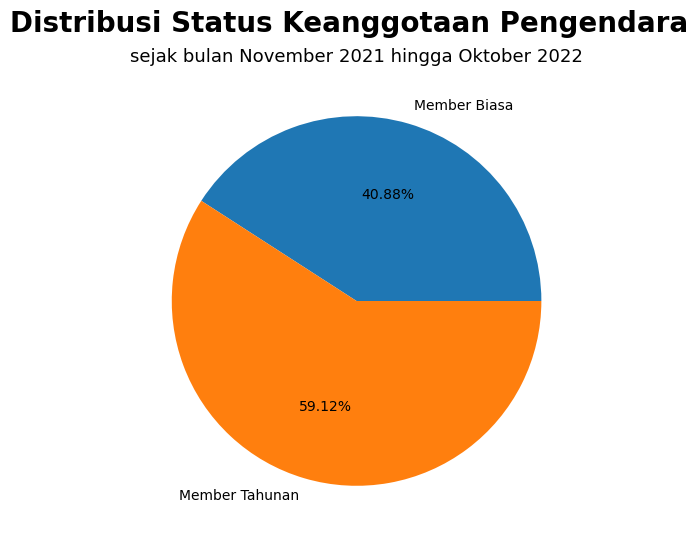

In [27]:
fig, distPlot = plt.subplots(figsize=(6,6))

plt.pie(x=mData, labels=mLabels, autopct='%.2f%%')
plt.suptitle('Distribusi Status Keanggotaan Pengendara', fontsize=20, weight='bold')
plt.title('sejak bulan November 2021 hingga Oktober 2022', fontsize=13)

distPlot.set_ylabel(None)

plt.show()

Secara keseluruhan, dalam kurun waktu satu tahun, masih terdapat 40.88% pengendara dengan status keanggotaan member biasa yang dapat dijadikan target promosi. Data ini dapat dijadikan acuan untuk melihat seberapa efektif promosi status keanggotaan tahunan nantinya.

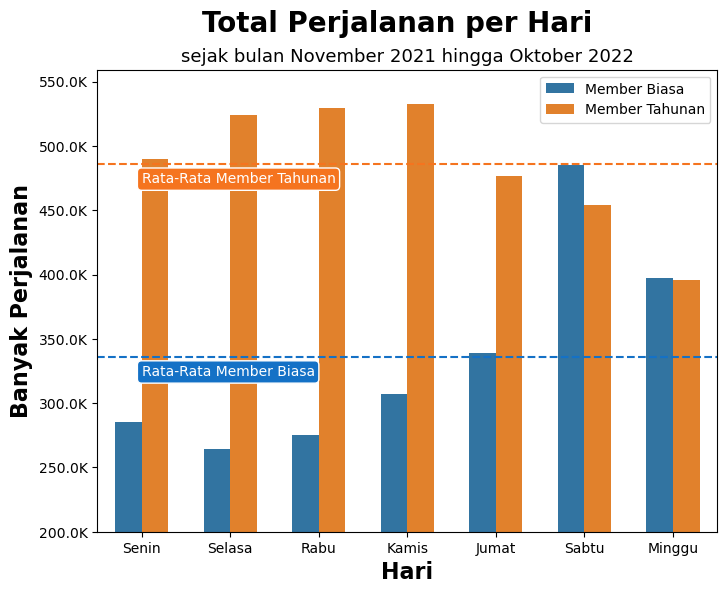

In [28]:
fig, dayPlot = plt.subplots(figsize=(8,6))
sns.barplot(x='dow',
            y='banyak perjalanan',
            hue='member_casual',
            width=0.6,
            data=tripDay,
            ax=dayPlot)

dayPlot.set_xlabel('Hari', fontsize=16, weight='bold')
dayPlot.set_ylabel('Banyak Perjalanan', fontsize=16, weight='bold')
dayPlot.set_xticklabels(['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])

plt.suptitle('Total Perjalanan per Hari', fontsize=20, weight='bold')
plt.title('sejak bulan November 2021 hingga Oktober 2022', fontsize=13)
plt.legend(fontsize='medium')

props = dict(boxstyle='round', facecolor='#1471C6', edgecolor='white')
props1 = dict(boxstyle='round', facecolor='#F5741F', edgecolor='white')
plt.text(0, adBiasa-15000, 'Rata-Rata Member Biasa', color='white', bbox=props)
plt.text(0, adTahun-15000, 'Rata-Rata Member Tahunan', color='white', bbox=props1)
plt.axhline(y=adBiasa, color='#1471C6', linestyle='--')
plt.axhline(y=adTahun, color='#F5741F', linestyle='--')

plt.ylim(bottom=200000)
dayPlot.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos:'{:,}'.format(y/1000) + 'K'))

plt.show()

Dari grafik ini dapat kita ketahui bahwa member biasa lebih banyak melakukan perjalanan pada akhir pekan, sedangkan member tahunan pada hari kerja. Kemungkinan besar member biasa menggunakan sepeda untuk bersantai di akhir pekan, sedangkan member tahunan menggunakan sepeda untuk bekerja.

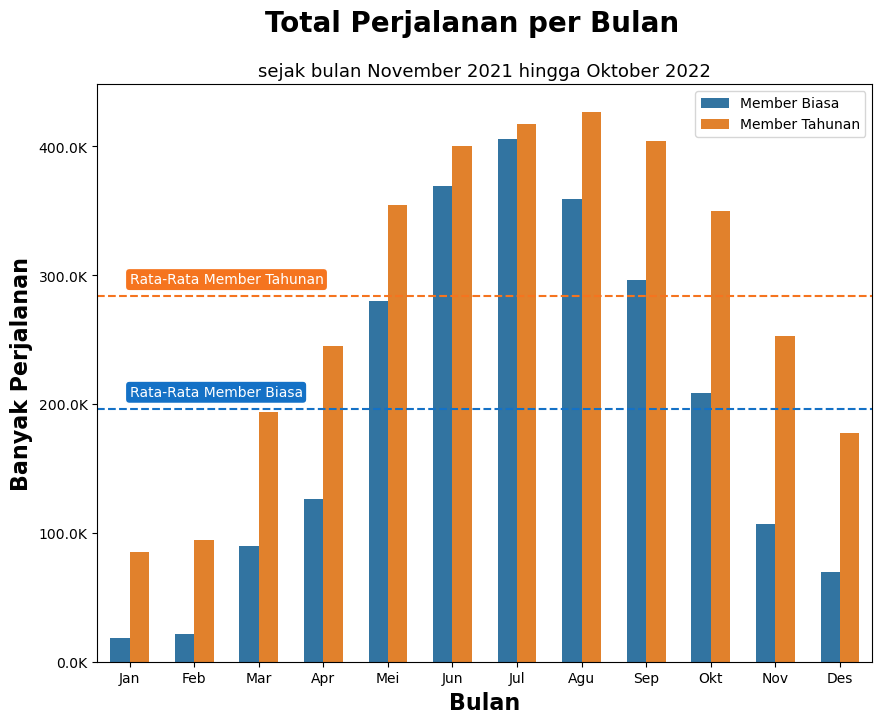

In [29]:
fig, monthPlot = plt.subplots(figsize=(10,7.5))
sns.barplot(x='month',
            y='banyak perjalanan',
            hue='member_casual',
            width=0.6,
            data=tripMonth,
            ax=monthPlot)

monthPlot.set_xlabel('Bulan', fontsize=16, weight='bold')
monthPlot.set_ylabel('Banyak Perjalanan', fontsize=16, weight='bold')
monthPlot.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul',
                          'Agu', 'Sep', 'Okt', 'Nov', 'Des'])

plt.suptitle('Total Perjalanan per Bulan', fontsize=20, weight='bold')
plt.title('sejak bulan November 2021 hingga Oktober 2022', fontsize=13)
plt.legend(fontsize='medium')

plt.text(0, amBiasa+10000, 'Rata-Rata Member Biasa', color='white', bbox=props)
plt.text(0, amTahun+10000, 'Rata-Rata Member Tahunan', color='white', bbox=props1)
plt.axhline(y=amBiasa, color='#1471C6', linestyle='--')
plt.axhline(y=amTahun, color='#F5741F', linestyle='--')

plt.locator_params(axis='y', nbins=5)

monthPlot.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos:'{:,}'.format(y/1000) + 'K'))

plt.show()

Terlihat pada grafik bahwa perjalanan, baik member biasa maupun tahunan, lebih banyak dilakukan (dari rata-rata) pada rentang bulan Mei s.d. Oktober. Dikutip dari data __[_National Centers of Environmental Information_](https://www.ncei.noaa.gov/access/services/data/v1?dataset=normals-monthly-1991-2020&startDate=0001-01-01&endDate=9996-12-31&stations=USC00111577&format=pdf)__, pada rentang waktu tersebut, temperatur di Chicago cenderung lebih hangat dibanding bulan-bulan lainnya, yakni sekitar $63-70 ^{o}F$ ($17-21 ^{o}C$). Hal tersebut terjadi karena Chicago mengalami musim semi (bulan Mei) dan musim panas (Juni s.d. Agustus). Sedangkan pada bulan September dan Oktober, Chicago telah memasuki musim gugur (temperatur mulai kembali turun) sehingga dapat terlihat dari grafik terjadi penurunan jumlah pengendara sepeda.

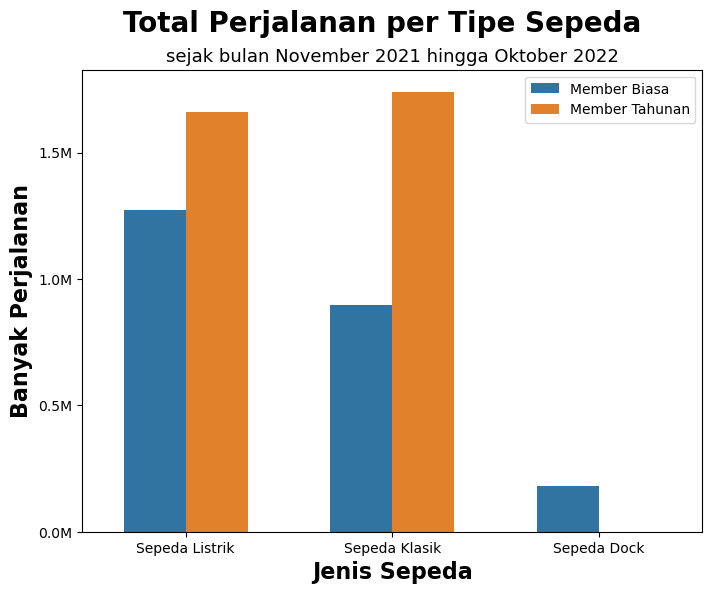

In [30]:
fig, bikePlot = plt.subplots(figsize=(8,6))
sns.countplot(x='rideable_type',
              hue='member_casual',
              width=0.6,
              data=bikeType,
              ax=bikePlot)

bikePlot.set_xlabel('Jenis Sepeda', fontsize=16, weight='bold')
bikePlot.set_ylabel('Banyak Perjalanan', fontsize=16, weight='bold')
bikePlot.set_xticklabels(['Sepeda Listrik', 'Sepeda Klasik', 'Sepeda Dock'])

plt.suptitle('Total Perjalanan per Tipe Sepeda', fontsize=20, weight='bold')
plt.title('sejak bulan November 2021 hingga Oktober 2022', fontsize=13)
plt.legend(fontsize='medium')

plt.locator_params(axis='y', nbins=4)

bikePlot.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos:'{:,}'.format(y/1000000) + 'M'))

plt.show()

Nampaknya, baik member biasa maupun tahunan, kurang berminat dengan sepeda jenis dock. Member biasa lebih berminat ke sepeda listrik sedangkan member tahunan lebih berminat ke sepeda klasik. Hal ini mendukung asumsi sebelumnya bahwa member biasa cenderung menggunakan sepeda untuk bersantai karena sepeda listrik lebih "ringan" untuk dipakai dibanding sepeda klasik. Namun demikian, jika pengendara ingin menggunakan sepeda listrik, maka dibutuhkan biaya tambahan sehingga member tahunan lebih memilih sepeda klasik (berdasarkan informasi dari __[Divvy](https://divvybikes.com/)__, perusahaan versi nyata dari Cyclistic).

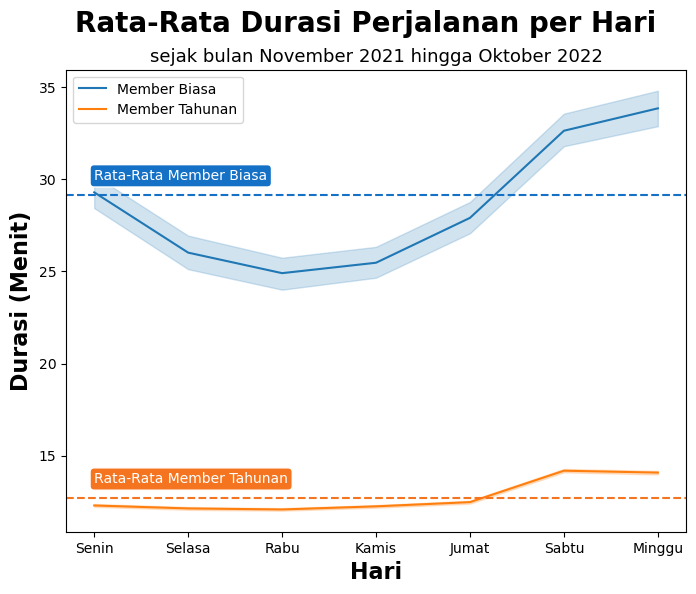

In [31]:
fig, dDPlot = plt.subplots(figsize=(8,6))
sns.lineplot(x='dow',
             y='ride_duration_in_m',
             hue='member_casual',
             markers=True,
             data=dayDuration)

dDPlot.set_xlabel('Hari', fontsize=16, weight='bold')
dDPlot.set_ylabel('Durasi (Menit)', fontsize=16, weight='bold')

plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.suptitle('Rata-Rata Durasi Perjalanan per Hari', fontsize=20, weight='bold')
plt.title('sejak bulan November 2021 hingga Oktober 2022', fontsize=13)
plt.legend(fontsize='medium')

plt.text(0, dlBiasa+0.8, 'Rata-Rata Member Biasa', color='white', bbox=props)
plt.text(0, dlTahun+0.8, 'Rata-Rata Member Tahunan', color='white', bbox=props1)
plt.axhline(y=dlBiasa, color='#1471C6', linestyle='--')
plt.axhline(y=dlTahun, color='#F5741F', linestyle='--')

plt.show()

Durasi perjalanan member biasa lebih dari dua kali lebih lama dibandingkan member tahunan. Hal ini menunjukkan bahwa strategi mempromosikan member tahunan adalah hal yang tepat untuk meningkatkan revenue perusahaan.

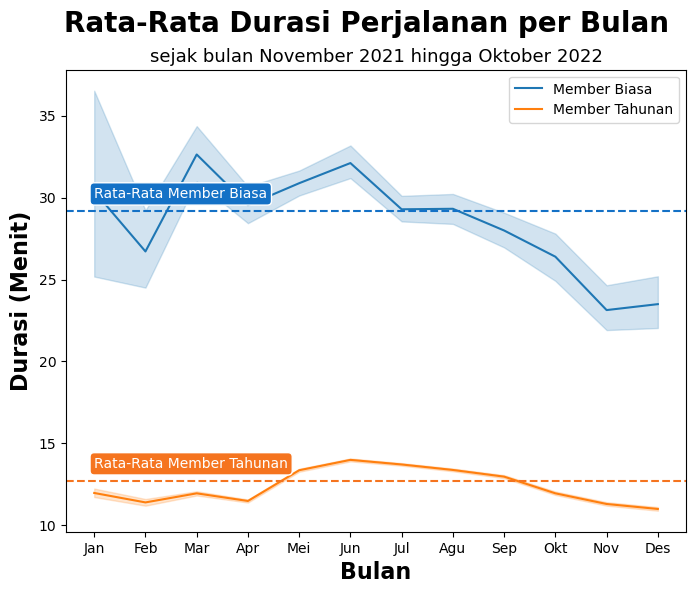

In [32]:
fig, mtPlot = plt.subplots(figsize=(8,6))
sns.lineplot(x='month',
             y='ride_duration_in_m',
             hue='member_casual',
             markers=True,
             data=monthDuration)

mtPlot.set_xlabel('Bulan', fontsize=16, weight='bold')
mtPlot.set_ylabel('Durasi (Menit)', fontsize=16, weight='bold')

plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
           ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.suptitle('Rata-Rata Durasi Perjalanan per Bulan', fontsize=20, weight='bold')
plt.title('sejak bulan November 2021 hingga Oktober 2022', fontsize=13)
plt.legend(fontsize='medium')

plt.text(1, mlBiasa+0.8, 'Rata-Rata Member Biasa', color='white', bbox=props)
plt.text(1, mlTahun+0.8, 'Rata-Rata Member Tahunan', color='white', bbox=props1)
plt.axhline(y=mlBiasa, color='#1471C6', linestyle='--')
plt.axhline(y=mlTahun, color='#F5741F', linestyle='--')

plt.show()

Disini juga terlihat bahwa durasi perjalanan member biasa lebih dari dua kali lebih lama dibandingkan member tahunan sepanjang tahun. Hal ini menunjukkan bahwa peningkatan revenue dari promosi member tahunan memiliki jangka waktu yang lama.

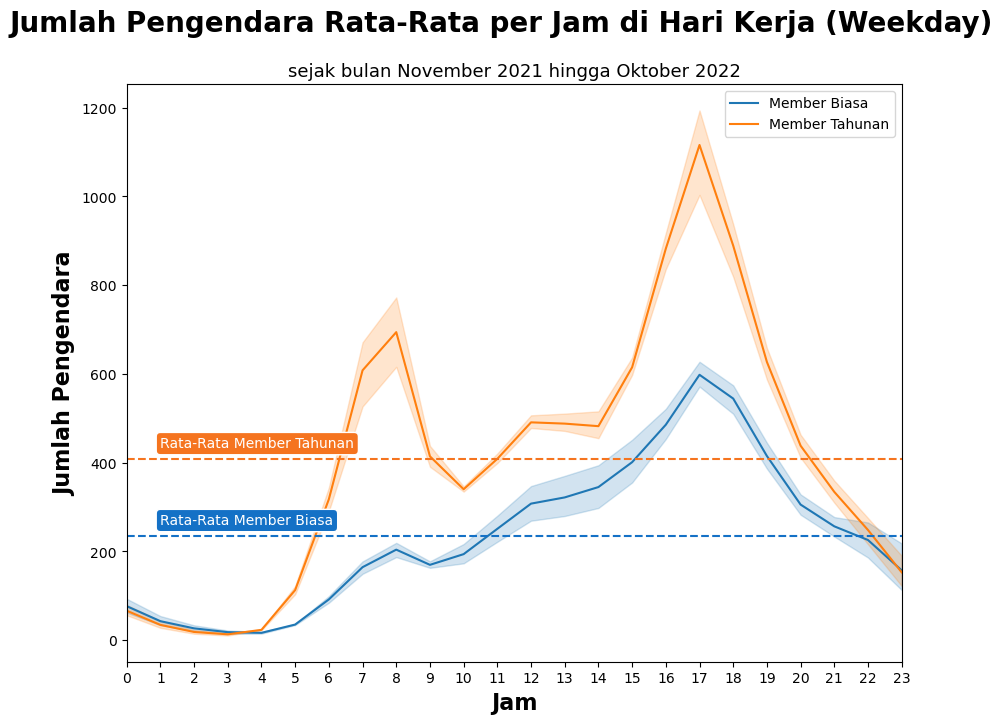

In [33]:
fig, wdPlot = plt.subplots(figsize=(10,7.5))
sns.lineplot(x='start_hour',
             y='count_rider',
             hue='member_casual',
             markers=True,
             data=weekDay)

wdPlot.set_xlabel('Jam', fontsize=16, weight='bold')
wdPlot.set_ylabel('Jumlah Pengendara', fontsize=16, weight='bold')

plt.suptitle('Jumlah Pengendara Rata-Rata per Jam di Hari Kerja (Weekday)', fontsize=20, weight='bold')
plt.title('sejak bulan November 2021 hingga Oktober 2022', fontsize=13)
plt.legend(fontsize='medium')
plt.locator_params(axis='x', nbins=24)
plt.xlim([0, 23])

plt.text(1, wdBiasa+25, 'Rata-Rata Member Biasa', color='white', bbox=props)
plt.text(1, wdTahun+25, 'Rata-Rata Member Tahunan', color='white', bbox=props1)
plt.axhline(y=wdBiasa, color='#1471C6', linestyle='--')
plt.axhline(y=wdTahun, color='#F5741F', linestyle='--')

plt.show()

Member tahunan nampak lebih banyak melakukan perjalanan pada jam-jam berangkat kerja dan pulang kerja. Pada jam istirahat, jumlah member tahunan yang melakukan perjalanan menurun. Hal ini kembali menguatkan asumsi sebelumnya bahwa member tahunan cenderung memakai sepeda untuk keperluan bekerja. Sedangkan member biasa lebih banyak memakai sepeda pada sore hari.

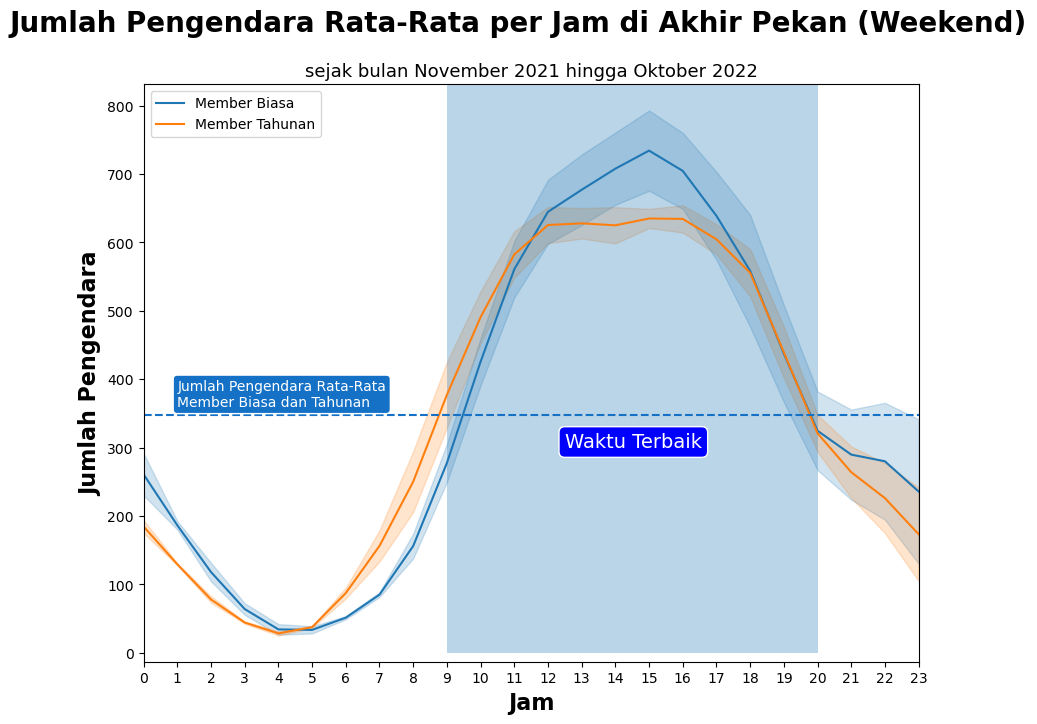

In [34]:
fig, wePlot = plt.subplots(figsize=(10,7.5))
sns.lineplot(x='start_hour',
             y='count_rider',
             hue='member_casual',
             markers=True,
             data=weekEnd)

wePlot.set_xlabel('Jam', fontsize=16, weight='bold')
wePlot.set_ylabel('Jumlah Pengendara', fontsize=16, weight='bold')

plt.suptitle('Jumlah Pengendara Rata-Rata per Jam di Akhir Pekan (Weekend)', fontsize=20, weight='bold')
plt.title('sejak bulan November 2021 hingga Oktober 2022', fontsize=13)
plt.legend(fontsize='medium')
plt.locator_params(axis='x', nbins=24)
plt.xlim([0, 23])

plt.text(1, weAverage+13, 'Jumlah Pengendara Rata-Rata\nMember Biasa dan Tahunan', color='white', bbox=props)
plt.axhline(y=weAverage, color='#1471C6', linestyle='--')

wePlot.add_patch(Rectangle((9,0), 11, 900, alpha=0.3))
props2 = dict(boxstyle='round', facecolor='blue', edgecolor='white')
plt.text(12.5, 300, 'Waktu Terbaik', color='white', fontsize=14 ,bbox=props2)

plt.show()

Pada akhir pekan, baik member biasa maupun tahunan, pengendara lebih banyak melakukan perjalanan pada jam 09.00 s.d. 20.00. Rentang waktu inilah yang paling tepat untuk dilakukan promosi member tahunan.

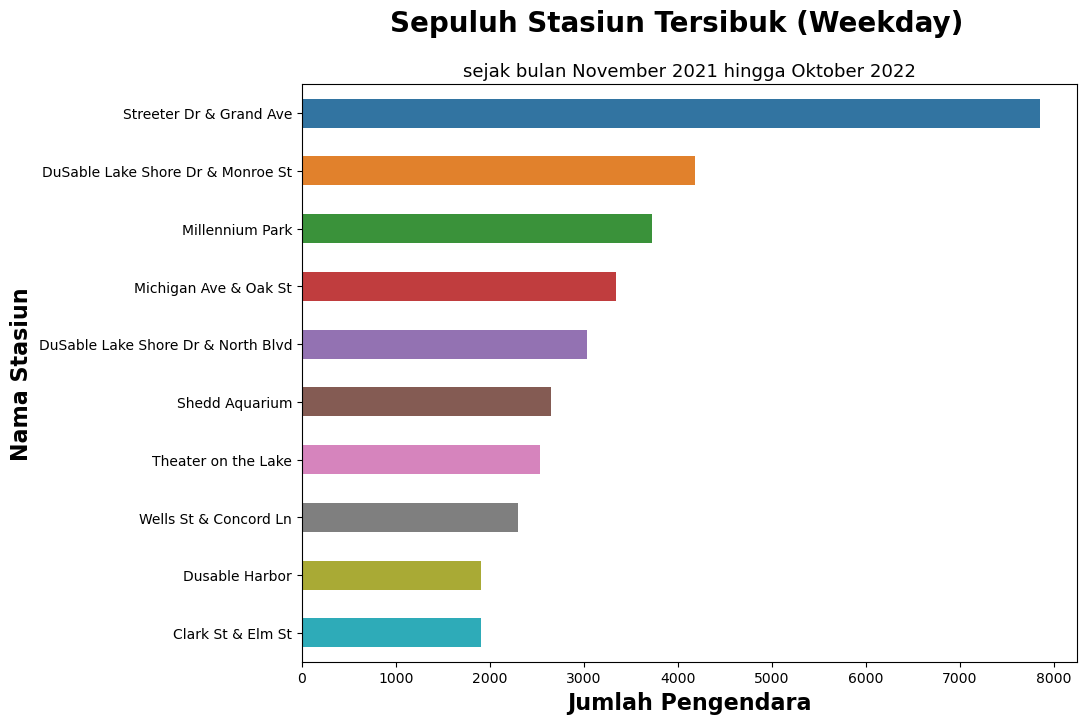

In [35]:
fig, bwdPlot = plt.subplots(figsize=(10,7.5))
sns.barplot(x='count_rider',
            y='start_station_name',
            width = 0.5,
            data=busyWd)

bwdPlot.set_xlabel('Jumlah Pengendara', fontsize=16, weight='bold')
bwdPlot.set_ylabel('Nama Stasiun', fontsize=16, weight='bold')

plt.suptitle('Sepuluh Stasiun Tersibuk (Weekday)', fontsize=20, weight='bold')
plt.title('sejak bulan November 2021 hingga Oktober 2022', fontsize=13)

plt.show()

Pada hari kerja, stasiun tersibuk adalah Streeter Dr & Grand Ave.

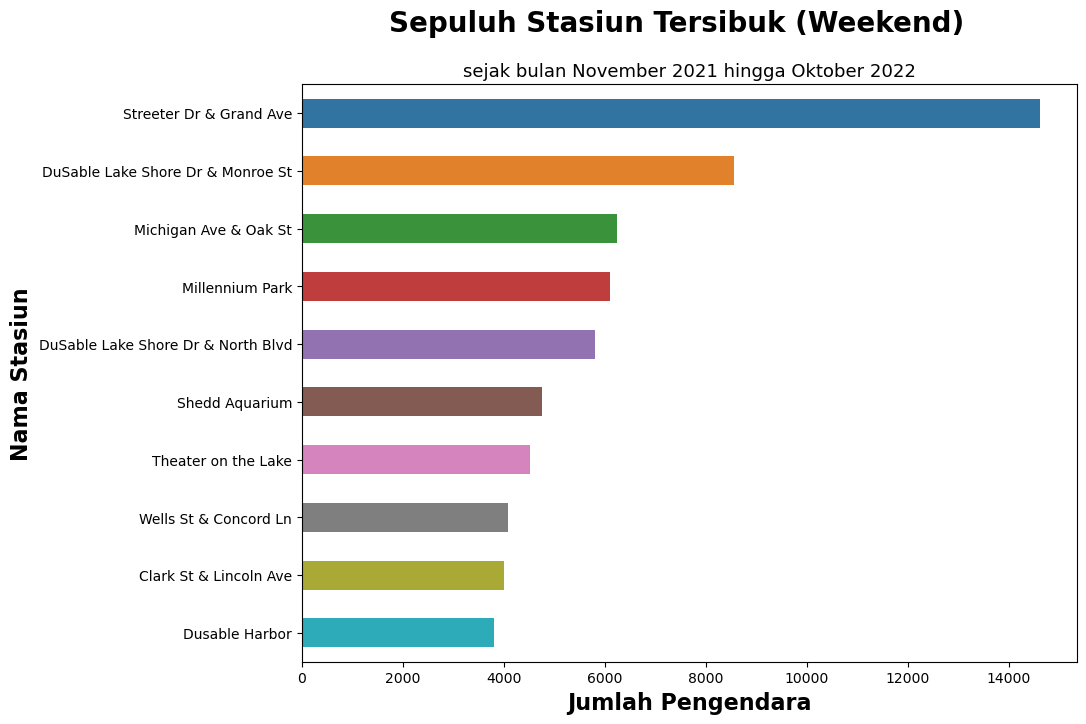

In [36]:
fig, bwePlot = plt.subplots(figsize=(10,7.5))
sns.barplot(x='count_rider',
            y='start_station_name',
            width = 0.5,
            data=busyWe)

bwePlot.set_xlabel('Jumlah Pengendara', fontsize=16, weight='bold')
bwePlot.set_ylabel('Nama Stasiun', fontsize=16, weight='bold')

plt.suptitle('Sepuluh Stasiun Tersibuk (Weekend)', fontsize=20, weight='bold')
plt.title('sejak bulan November 2021 hingga Oktober 2022', fontsize=13)

plt.show()

Pada akhir pekan juga, stasiun tersibuk adalah Streeter Dr & Grand Ave. Ini adalah lokasi terbaik untuk mempromosikan member tahunan pada member biasa.

## Bertindak Berdasarkan Data (_Act_)

### Temuan Utama

Berdasarkan data, dapat diketahui beberapa hal berikut:
1. Distribusi pengendara sepeda adalah sekitar 59% member tahunan dan 41% member biasa.
2. Member biasa lebih cenderung menggunakan sepeda untuk bersantai, sedangkan member tahunan lebih cenderung menggunakan sepeda untuk bekerja.
3. Sepeda listrik lebih diminati member biasa, Sepeda kasual lebih diminati member tahunan, dan sepeda dok kurang diminati member biasa maupun member tahunan.
4. Pengendara lebih banyak melakukan perjalanan pada bulan Mei s.d. Oktober.
5. Di akhir pekan, pengendara lebih banyak melakukan perjalanan  pada jam 09.00 s.d. 20.00.
6. Setiap harinya, stasiun Streeter Dr & Grand Ave lebih sibuk dibanding stasiun manapun.

### Rekomendasi

Berdasarkan temuan, untuk menggunakan media digital sebagai media promosi member tahunan maka perlu memerhatikan beberapa hal berikut:
1. Promosi dilakukan pada jam 09.00 s.d. 20.00, di bulan Mei s.d. Oktober.
2. Sepeda dock kurang diminati sehingga tidak disarankan mempromosikan sepeda jenis tersebut.
3. Lebih diutamakan mempromosikan member tahunan di sekitar stasiun Streeter Dr & Grand Ave.
4. Mengingat terjadi peningkatan jumlah pengendara di bulan-bulan tertentu, maka disarankan untuk menambahkan jenis membership bulanan.